In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Embedding,SpatialDropout1D,Dense,LSTM,Flatten
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.datasets import imdb
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


[]


In [2]:
nepochs=8
max_review_length=100
pad_type=trunc_type='pre'
drop_embed=0.2
drop_lstm=0.2
batchsize=128
n_unique=10000
n_lstm=256
ndims=64

In [3]:
(xtrain,ytrain),(xvalid,yvalid)=imdb.load_data(num_words=n_unique)

17465344/17464789 [==============================] - 10s 1us/step


In [4]:
xtrain1=pad_sequences(xtrain,maxlen=max_review_length,padding=pad_type,truncating=trunc_type)
xvalid1=pad_sequences(xvalid,maxlen=max_review_length,padding=pad_type,truncating=trunc_type)

In [5]:
[len(i) for i in xtrain1[:10]]

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

In [6]:
model=Sequential()
model.add(Embedding(n_unique,ndims,input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(LSTM(n_lstm,dropout=drop_lstm))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 968,961
Trainable params: 968,961
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
history=model.fit(xtrain1,ytrain,batch_size=batchsize,epochs=nepochs,verbose=1,validation_data=(xvalid1,yvalid))

Train on 25000 samples, validate on 25000 samples
Epoch 1/8
25000/25000 [==============================] - 64s 3ms/step - loss: 0.5008 - acc: 0.7448 - val_loss: 0.3530 - val_acc: 0.8420
Epoch 2/8
25000/25000 [==============================] - 60s 2ms/step - loss: 0.2940 - acc: 0.8804 - val_loss: 0.3532 - val_acc: 0.8460
Epoch 3/8
25000/25000 [==============================] - 60s 2ms/step - loss: 0.2351 - acc: 0.9082 - val_loss: 0.3768 - val_acc: 0.8446
Epoch 4/8
25000/25000 [==============================] - 60s 2ms/step - loss: 0.2005 - acc: 0.9219 - val_loss: 0.3699 - val_acc: 0.8437
Epoch 5/8
25000/25000 [==============================] - 60s 2ms/step - loss: 0.1685 - acc: 0.9366 - val_loss: 0.4396 - val_acc: 0.8396
Epoch 6/8
25000/25000 [==============================] - 60s 2ms/step - loss: 0.1343 - acc: 0.9524 - val_loss: 0.4346 - val_acc: 0.8386
Epoch 7/8
25000/25000 [==============================] - 60s 2ms/step - loss: 0.1198 - acc: 0.9553 - val_loss: 0.4898 - val_acc: 0.830

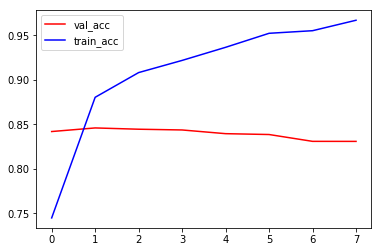

In [11]:
plt.plot(history.history['val_acc'],'r',label='val_acc')
plt.plot(history.history['acc'],'b',label='train_acc')
plt.legend()

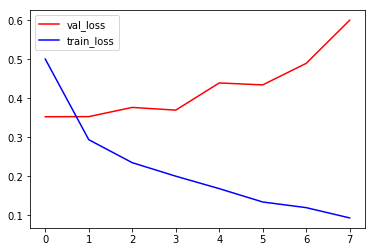

In [12]:
plt.plot(history.history['val_loss'],'r',label='val_loss')
plt.plot(history.history['loss'],'b',label='train_loss')
plt.legend()

In [14]:
#Tuning Hyperparameters
max_review_length=150

In [15]:
xtrain1=pad_sequences(xtrain,maxlen=max_review_length,padding=pad_type,truncating=trunc_type)
xvalid1=pad_sequences(xvalid,maxlen=max_review_length,padding=pad_type,truncating=trunc_type)

In [16]:
model=Sequential()
model.add(Embedding(n_unique,ndims,input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(LSTM(n_lstm,dropout=drop_lstm))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 150, 64)           640000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 150, 64)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 968,961
Trainable params: 968,961
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
history1=model.fit(xtrain1,ytrain,batch_size=batchsize,epochs=nepochs,verbose=1,validation_data=(xvalid1,yvalid))

Train on 25000 samples, validate on 25000 samples
Epoch 1/8
25000/25000 [==============================] - 91s 4ms/step - loss: 0.5586 - acc: 0.6970 - val_loss: 0.3713 - val_acc: 0.8414
Epoch 2/8
25000/25000 [==============================] - 90s 4ms/step - loss: 0.2939 - acc: 0.8783 - val_loss: 0.3750 - val_acc: 0.8564
Epoch 3/8
25000/25000 [==============================] - 90s 4ms/step - loss: 0.2228 - acc: 0.9137 - val_loss: 0.3253 - val_acc: 0.8649
Epoch 4/8
25000/25000 [==============================] - 90s 4ms/step - loss: 0.1889 - acc: 0.9290 - val_loss: 0.3753 - val_acc: 0.8561
Epoch 5/8
25000/25000 [==============================] - 90s 4ms/step - loss: 0.1516 - acc: 0.9428 - val_loss: 0.3742 - val_acc: 0.8590
Epoch 6/8
25000/25000 [==============================] - 89s 4ms/step - loss: 0.1241 - acc: 0.9544 - val_loss: 0.8871 - val_acc: 0.8210
Epoch 7/8
25000/25000 [==============================] - 89s 4ms/step - loss: 0.1191 - acc: 0.9574 - val_loss: 0.5626 - val_acc: 0.843

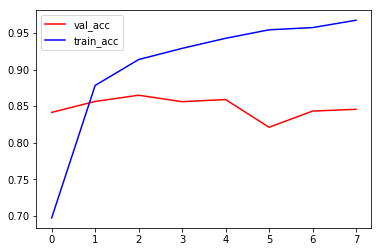

In [20]:
plt.plot(history1.history['val_acc'],'r',label='val_acc')
plt.plot(history1.history['acc'],'b',label='train_acc')
plt.legend()

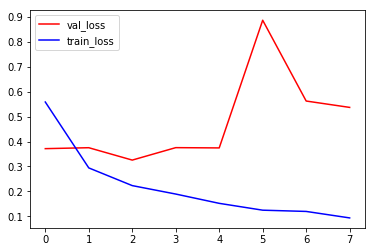

In [21]:
plt.plot(history1.history['val_loss'],'r',label='val_loss')
plt.plot(history1.history['loss'],'b',label='train_loss')
plt.legend()

In [22]:
# Tuning the Hyperparameter
# Increasing n_neurons in LSTM

In [25]:
n_lstm=512
max_review_length=150

In [24]:
xtrain1=pad_sequences(xtrain,maxlen=max_review_length,padding=pad_type,truncating=trunc_type)
xvalid1=pad_sequences(xvalid,maxlen=max_review_length,padding=pad_type,truncating=trunc_type)

In [26]:
model=Sequential()
model.add(Embedding(n_unique,ndims,input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(LSTM(n_lstm,dropout=drop_lstm))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150, 64)           640000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 150, 64)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 512)               1181696   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 1,822,209
Trainable params: 1,822,209
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
history2=model.fit(xtrain1,ytrain,batch_size=batchsize,epochs=4,verbose=1,validation_data=(xvalid1,yvalid))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 109s 4ms/step - loss: 0.5160 - acc: 0.7384 - val_loss: 0.3638 - val_acc: 0.8468
Epoch 2/4
25000/25000 [==============================] - 107s 4ms/step - loss: 0.2900 - acc: 0.8828 - val_loss: 0.3222 - val_acc: 0.8648
Epoch 3/4
25000/25000 [==============================] - 107s 4ms/step - loss: 0.2257 - acc: 0.9136 - val_loss: 0.3284 - val_acc: 0.8590
Epoch 4/4
25000/25000 [==============================] - 107s 4ms/step - loss: 0.1833 - acc: 0.9304 - val_loss: 0.3365 - val_acc: 0.8597


In [30]:
y_hat=model.predict_proba(xvalid1)

In [33]:
percentage_roc_auc=roc_auc_score(yvalid,y_hat)*100

In [34]:
percentage_roc_auc

93.5839488

(array([8279., 1640.,  950.,  736.,  645.,  653.,  704.,  880., 1515.,
        8998.]),
 array([3.02310564e-05, 1.00024156e-01, 2.00018078e-01, 3.00011992e-01,
        4.00005937e-01, 4.99999851e-01, 5.99993765e-01, 6.99987710e-01,
        7.99981654e-01, 8.99975538e-01, 9.99969482e-01], dtype=float32),
 <a list of 10 Patch objects>)

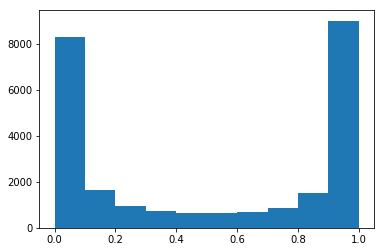

In [35]:
plt.hist(y_hat)

In [ ]:
###DONE ####